In [32]:
# Import the time library and the datetime module from the datetime library
import pandas as pd
import time
from datetime import datetime
import requests
from config import weather_api_key
import matplotlib.pyplot as plt

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a288c9e5629ba33b3960826b7d39dd61


In [34]:
cities = ['Tuktoyaktuk', 'Hemanus', 'Bluff', 'Port Alfred', 'Outjo', 'Agadez', 'Paso De Los Toros', 'Avarua', 'Taltal', 'Airai']

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [36]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

# Create endpoint URL with each city.
city_url = url + "&q=" + cities[i]

In [37]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete      ")
print("----------------------------")

Processing Record 1 of Set 1 | Tuktoyaktuk
Processing Record 2 of Set 1 | Hemanus
City not found. Skipping...
Processing Record 3 of Set 1 | Bluff
Processing Record 4 of Set 1 | Port Alfred
Processing Record 5 of Set 1 | Outjo
Processing Record 6 of Set 1 | Agadez
Processing Record 7 of Set 1 | Paso De Los Toros
Processing Record 8 of Set 1 | Avarua
Processing Record 9 of Set 1 | Taltal
Processing Record 10 of Set 1 | Airai
----------------------------
Data Retrieval Complete      
----------------------------


In [38]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,14.00,85,100,24.16,CA,2023-02-24 14:50:45
1,Bluff,-46.6000,168.3333,49.41,82,1,6.89,NZ,2023-02-24 14:50:45
2,Port Alfred,-33.5906,26.8910,75.18,88,46,5.99,ZA,2023-02-24 14:50:45
3,Outjo,-20.1167,16.1500,92.59,20,69,6.93,NA,2023-02-24 14:50:45
4,Agadez,19.7500,10.2500,83.80,6,0,5.10,NE,2023-02-24 14:50:46
5,Paso De Los Toros,-32.8167,-56.5167,81.19,49,97,5.93,UY,2023-02-24 14:50:46
6,Avarua,-21.2078,-159.7750,78.85,94,40,3.44,CK,2023-02-24 14:50:46
7,Taltal,-25.4000,-70.4833,73.08,67,0,6.96,CL,2023-02-24 14:50:46
8,Airai,-8.9266,125.4092,61.09,94,96,3.49,TL,2023-02-24 14:50:46


In [39]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2023-02-24 14:50:45,69.4541,-133.0374,14.00,85,100,24.16
1,Bluff,NZ,2023-02-24 14:50:45,-46.6000,168.3333,49.41,82,1,6.89
2,Port Alfred,ZA,2023-02-24 14:50:45,-33.5906,26.8910,75.18,88,46,5.99
3,Outjo,NA,2023-02-24 14:50:45,-20.1167,16.1500,92.59,20,69,6.93
4,Agadez,NE,2023-02-24 14:50:46,19.7500,10.2500,83.80,6,0,5.10
5,Paso De Los Toros,UY,2023-02-24 14:50:46,-32.8167,-56.5167,81.19,49,97,5.93
6,Avarua,CK,2023-02-24 14:50:46,-21.2078,-159.7750,78.85,94,40,3.44
7,Taltal,CL,2023-02-24 14:50:46,-25.4000,-70.4833,73.08,67,0,6.96
8,Airai,TL,2023-02-24 14:50:46,-8.9266,125.4092,61.09,94,96,3.49


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [42]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/24/23'

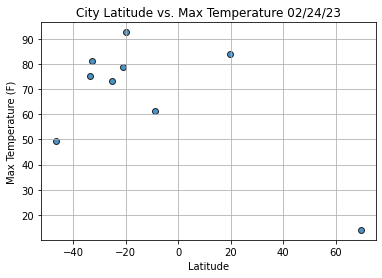

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

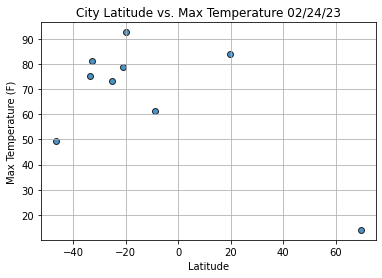

In [45]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

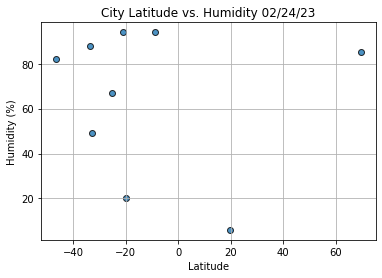

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

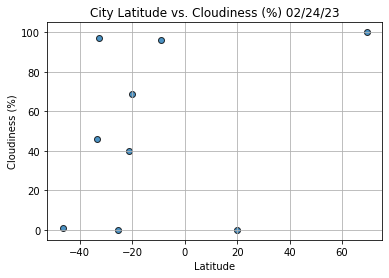

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")


# Show plot.
plt.show()

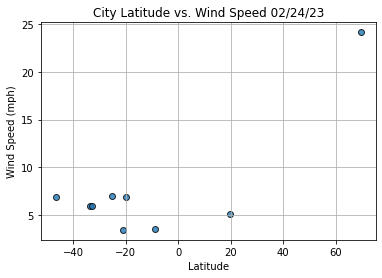

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [55]:
# Import linregress
from scipy.stats import linregress

In [71]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [83]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bluff,NZ,2023-02-24 14:50:45,-46.6000,168.3333,49.41,82,1,6.89
2,Port Alfred,ZA,2023-02-24 14:50:45,-33.5906,26.8910,75.18,88,46,5.99
3,Outjo,NA,2023-02-24 14:50:45,-20.1167,16.1500,92.59,20,69,6.93
5,Paso De Los Toros,UY,2023-02-24 14:50:46,-32.8167,-56.5167,81.19,49,97,5.93
6,Avarua,CK,2023-02-24 14:50:46,-21.2078,-159.7750,78.85,94,40,3.44
7,Taltal,CL,2023-02-24 14:50:46,-25.4000,-70.4833,73.08,67,0,6.96
8,Airai,TL,2023-02-24 14:50:46,-8.9266,125.4092,61.09,94,96,3.49


In [85]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2023-02-24 14:50:45,69.4541,-133.0374,14.0,85,100,24.16
4,Agadez,NE,2023-02-24 14:50:46,19.7500,10.2500,83.8,6,0,5.10


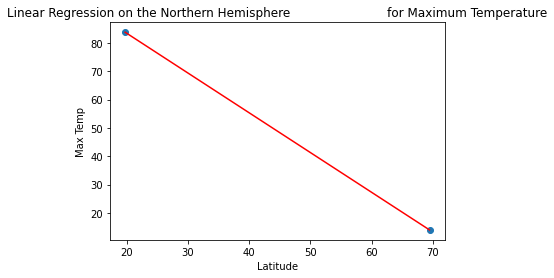

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

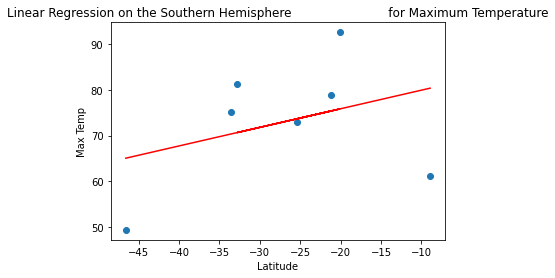

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

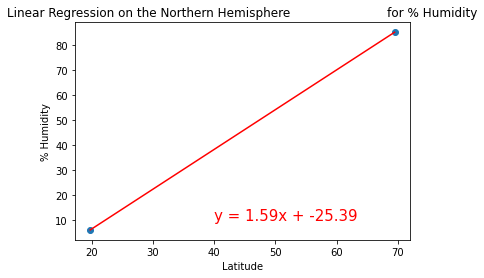

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

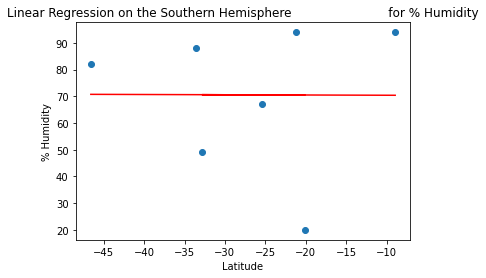

In [97]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

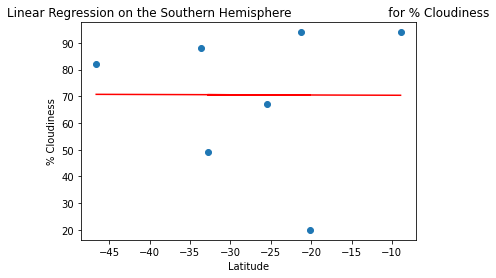

In [99]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,65))

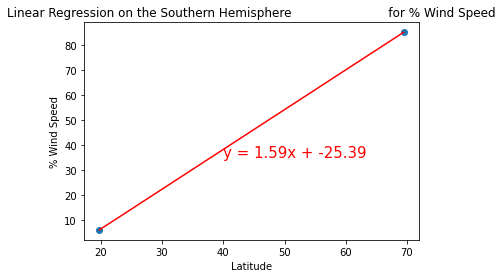

In [106]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(40,35))

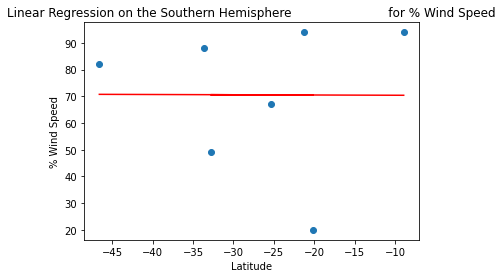

In [108]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(-50,35))